In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
# from keras.applications.resnet50 import ResNet50 
# from keras.applications import resnet50
from keras.applications.imagenet_utils import decode_predictions 
import tensorflow_hub as hub

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
Efficientnet_b0 = "https://tfhub.dev/google/efficientnet/b0/classification/1"

In [4]:
hub.KerasLayer(Efficientnet_b0, trainable = False, input_shape = (255,255,3), name = 'Efficientnet_b0')

2023-07-17 12:30:44.705526: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [5]:
reloaded_model = tf.keras.models.load_model("./fruit.h5", custom_objects={'KerasLayer':hub.KerasLayer})
# reloaded_model = tf.keras.experimental.load_from_saved_model('./food_recognition_Resnet+korea_145class.h5', custom_objects={'KerasLayer':hub.KerasLayer})
print(reloaded_model.get_config())

#Get input shape from model.get_config()
reloaded_model.build((None, 250, 250, 3))
reloaded_model.summary()

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 255, 255, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'Efficientnet_b0_input'}}, {'class_name': 'KerasLayer', 'config': {'name': 'Efficientnet_b0', 'trainable': False, 'dtype': 'float32', 'batch_input_shape': (None, 255, 255, 3), 'handle': 'https://tfhub.dev/google/efficientnet/b0/classification/1', 'signature': 'default', 'output_key': 'default'}}, {'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}}, {'class_name': 'Dense', 'config': {'name': 'Output_layer', 'trainable': True, 'dtype': 'float32', 'units': 33, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constrain

In [11]:
class_map = {'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}
classes = []
for key in class_map.keys():
    classes.append(key)
print(class_map)

{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}


In [8]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(255, 255))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)

    indexk = np.argsort(prediction[0,:])[::-1]

    for i in range(10):
        print("{}. {} ({:.3})".format(i+1, classes[indexk[i]], prediction[0, indexk[i]]))

    index = np.argmax(prediction)
    print()
    print(classes[index])
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

1/1 [==============================] - 0s 34ms/step
1. Grape Blue (1.0)
2. Blueberry (6.48e-06)
3. Apricot (1.32e-06)
4. Avocado (1.26e-06)
5. Cherry (1.05e-06)
6. Mango (8.43e-07)
7. Papaya (6.7e-07)
8. Passion Fruit (5.75e-07)
9. Plum (3.75e-07)
10. Orange (1.47e-07)

Grape Blue


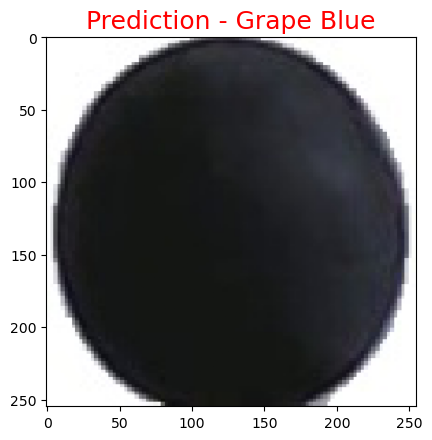